#    Loan Prediction solution

In this notebook, I have used different classifications algorithms to demonstrate that it's very important to understand which algorithm/model is best suitable and for which problem.
- **LogisticRegression**
- **Naive Bayes**
- **KNeighbors**
- **Random Forest**
- **SVM**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Step 1 - Loading data

In [66]:
#Loading the dataset

train=pd.read_csv(r"B:/Projects/Loan prediction problem/train.csv") 

**Displaying first 5 rows to get an overview of data**

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
train.shape

(614, 13)

In [49]:
train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [50]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Step 2 - Data Analysis and Cleaning

**Finding missing values**

In [51]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
train.isnull().sum().sum()

149

In [53]:
train.shape

(614, 13)

**Drop unnecessary rows/data**

In [67]:
train = train.drop('Loan_ID', axis=1)
train = train.dropna(how='any', subset=['LoanAmount', 'Married', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])

In [55]:
train.shape

(502, 12)

In [56]:
train.isnull().sum().sum()

22

In [68]:
train['Gender'] = train['Gender'].fillna(value='Can\'t say')
train['Dependents'] = train['Dependents'].fillna(value=0)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(value=train['Loan_Amount_Term'].mean())

In [58]:
train.isnull().sum().sum()

0

### Dataset has been cleaned

In [40]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## **Now we need to `encode` our values from categorical to numerical data so that it would be easier for data modelling.**
### - We will use `LabelEncoder` for that

In [70]:
le = LabelEncoder()

print('Gender : ',train['Gender'].unique())
train['Gender'] = le.fit_transform(train['Gender'])
print('Gender : ',train['Gender'].unique())
print('')
print('Married : ',train['Married'].unique())
train['Married'] = le.fit_transform(train['Married'])
print('Married : ',train['Married'].unique())
print('')
print('Education : ',train['Education'].unique())
train['Education'] = le.fit_transform(train['Education'])
print('Education : ',train['Education'].unique())
print('')
print('Self_Employed : ',train['Self_Employed'].unique())
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
print('Self_Employed : ',train['Self_Employed'].unique())
print('')
print('Property_Area : ',train['Property_Area'].unique())
train['Property_Area'] = le.fit_transform(train['Property_Area'])
print('Property_Area : ',train['Property_Area'].unique())
print('')
print('Loan_Status : ',train['Loan_Status'].unique())
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
print('Loan_Status : ',train['Loan_Status'].unique())

Gender :  ['Male' 'Female' "Can't say"]
Gender :  [2 1 0]

Married :  ['Yes' 'No']
Married :  [1 0]

Education :  ['Graduate' 'Not Graduate']
Education :  [0 1]

Self_Employed :  ['No' 'Yes']
Self_Employed :  [0 1]

Property_Area :  ['Rural' 'Urban' 'Semiurban']
Property_Area :  [0 2 1]

Loan_Status :  ['N' 'Y']
Loan_Status :  [0 1]


In [71]:
train.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### Converting all object types to integer types

In [72]:
train['Gender'] = train['Gender'].astype('int')
train['Married'] = train['Married'].astype('int')
train['Education'] = train['Education'].astype('int')
train['Self_Employed'] = train['Self_Employed'].astype('int')
train['Property_Area'] = train['Property_Area'].astype('int')
train['Property_Area'] = train['Property_Area'].astype('int')
train['Loan_Status'] = train['Loan_Status'].astype('int')

In [73]:
train['Dependents'] = train['Dependents'].replace('3+',3)
train['Dependents'] = train['Dependents'].astype('int')

In [74]:
train['ApplicantIncome'] = train['ApplicantIncome']/1000
train['CoapplicantIncome'] = train['CoapplicantIncome']/1000
train['LoanAmount'] = train['LoanAmount']/1000
train['Loan_Amount_Term'] = train['Loan_Amount_Term']/1000

In [75]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Step 3 - Data Visualization

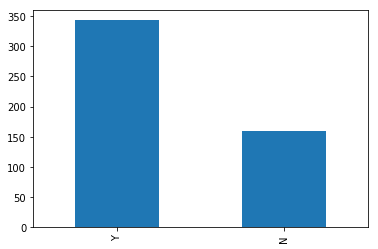

In [18]:
train['Loan_Status'].value_counts().plot.bar()

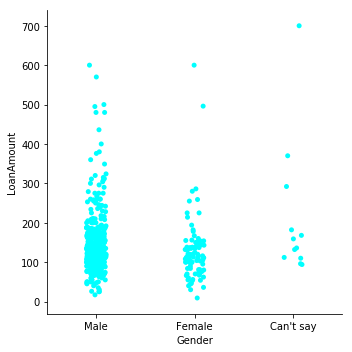

In [19]:
sns.catplot(x="Gender", y="LoanAmount", data=train, color='aqua');

**Male takes more loan than female or others**

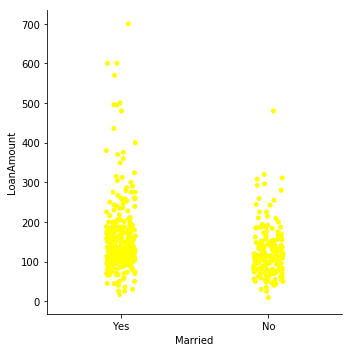

In [20]:
sns.catplot(x="Married", y="LoanAmount", data=train, color='yellow');

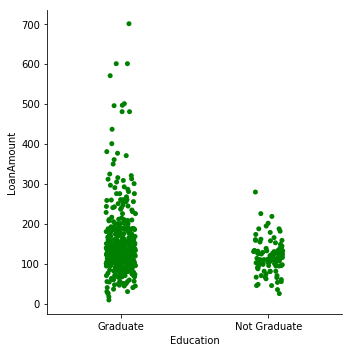

In [21]:
sns.catplot(x="Education", y="LoanAmount", data=train, color='green');

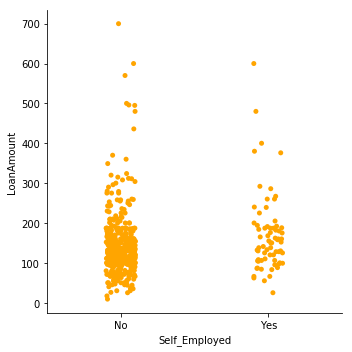

In [22]:
sns.catplot(x="Self_Employed", y="LoanAmount", data=train, color='orange');

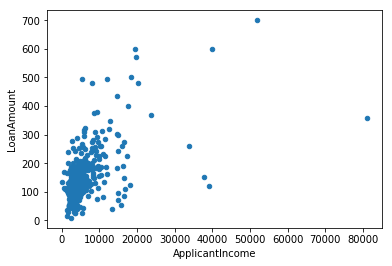

In [23]:
plot = train.plot.scatter('ApplicantIncome','LoanAmount')

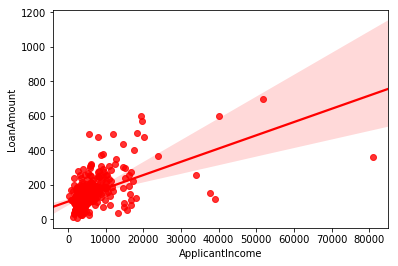

In [24]:
sns.regplot('ApplicantIncome','LoanAmount', data=train, color='red')

**It is clearly visible from above regplot that:**
- People with low income tend to take loan more
- Also, people with high income take hogh amound of loan for big investments

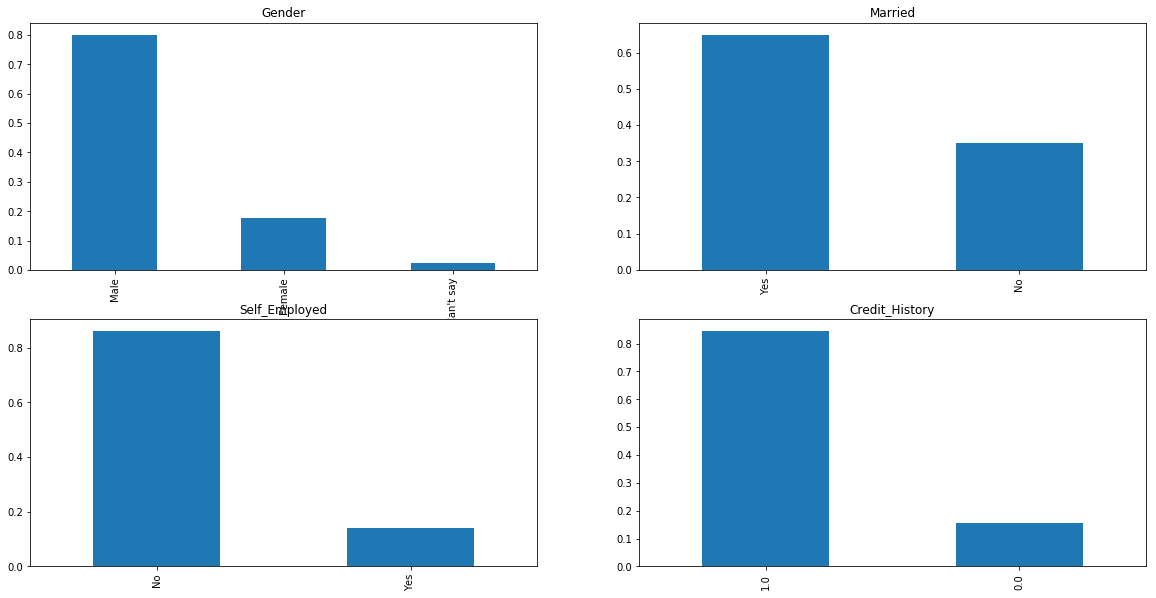

In [25]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

**It can be inferred from the above bar plots that:**

- 80% applicants in the dataset are male.<br></br>
- Around 65% of the applicants in the dataset are married.<br></br>
- Around 15% applicants in the dataset are self employed.<br></br>
- Around 85% applicants have repaid their debts.

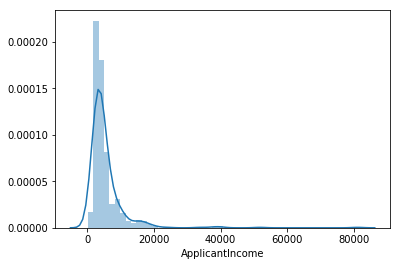

In [26]:
sns.distplot(train['ApplicantIncome'])

**It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed**

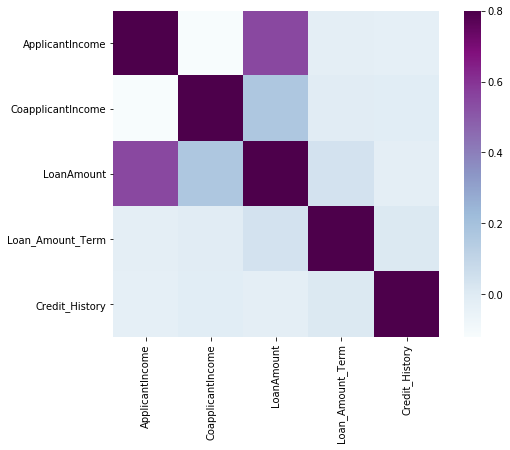

In [27]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [37]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,2,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,2,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,2,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Step 4 - Data Modelling

### Train-Test-Split

In [76]:
y = train['Loan_Status']
x = train.drop(['Loan_Status'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

## 1. ` Logistic Regression`

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(x_train,y_train)

LogisticRegression()

**Applying R squared method to evaluate the model**

In [79]:
lr.score(x_test, y_test)*100

75.59523809523809

In [80]:
lr.score(x_train, y_train)*100

84.13173652694611

In [81]:
y_pred = lr.predict(x_test)

## 2. ` Naive Bayes`

In [310]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [311]:
nb.score(x_train, y_train)

0.8323353293413174

In [312]:
nb.score(x_test, y_test)

0.75

## 3. `KNN`

In [313]:
knn = KNeighborsClassifier(n_neighbors=10)

In [314]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [315]:
knn.score(x_test, y_test)

0.625

## 4. `Random Forest`

In [316]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [317]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [318]:
display(regressor.score(x_test,y_test))

0.18117587301587323

In [319]:
display(regressor.score(x_train,y_train))

0.897424518557423

## 5. `Support Vector Machines (SVM)`

In [320]:
svc = svm.SVC(kernel ='linear', C = 1).fit(x_train, y_train) 

In [321]:
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [322]:
svc.score(x_test, y_test)

0.7559523809523809

In [323]:
svc.score(x_train, y_train)

0.8383233532934131

## All models together

In [327]:
models = {'LR':LogisticRegression(), 'NB':GaussianNB(), 'KNN':KNeighborsClassifier(n_neighbors=10), 'RF':RandomForestRegressor(n_estimators = 100),'SVM':svm.SVC()}
accuracy_list = {}
for key,value in models.items():
    model = value
    model.fit(x_train, y_train)
    accuracy_list.update({key:model.score(x_test, y_test)})

C:\Users\Shray\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shray\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [325]:
accuracy_list

{'LR': 0.7559523809523809,
 'NB': 0.75,
 'KNN': 0.625,
 'RF': 0.16983619047619047,
 'SVM': 0.7142857142857143}

In [326]:
print('Best model is : `{}` '.format(max(accuracy_list, key=accuracy_list.get)))

Best model is : `LR` 


## Additional knowledge

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- **Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
- **EMI** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
- **Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [255]:
train['Total_Income']=(train['ApplicantIncome']+train['CoapplicantIncome'] )/1000

In [256]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

In [257]:
train['Balance Income']=(train['Total_Income']-(train['EMI']*1000))/1000
# Multiply with 1000 to make the units equal

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.



In [258]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [259]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance Income
1,2,1,1,0,0,1.0,0,0,0.006091,0.355556,-0.355549
2,2,1,0,0,1,1.0,2,1,0.003000,0.183333,-0.183330
3,2,1,0,1,0,1.0,2,1,0.004941,0.333333,-0.333328
4,2,0,0,0,0,1.0,2,1,0.006000,0.391667,-0.391661
5,2,1,2,0,1,1.0,2,1,0.009613,0.741667,-0.741657


In [260]:
y = train['Loan_Status']
x = train.drop(['Loan_Status'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

In [261]:
lr.fit(x_train,y_train)

C:\Users\Shray\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [262]:
lr.score(x_test, y_test)

0.7559523809523809